# Credit EDA Case Study

In this assignment we will be using Exploratory Data Analytics to minimise the risk of losing money while lending it different groups of customer.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Business Understanding

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases:** All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- **Approved:** The Company has approved loan Application

- **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

- **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

## 1. Importing the Libraries and the Application Data Set

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data set of "application_data" in inp0.
inp0=pd.read_csv("application_data.csv")

In [3]:
#Print the head of the data frame.
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Checking shape of the dataframe
inp0.shape

(307511, 122)

In [5]:
#To display all the rows and columns in the dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2. Inspecting and Filtering the Data Set

In [6]:
#Checking datatypes of each field in dataframe
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
#Checking for percentage of the missing values in each column
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
#Checking for coloums having more than 35% null value

emptyCol=inp0.isnull().sum()/len(inp0)*100
emptyCol=emptyCol[emptyCol.values>35.0]
print(emptyCol)
len(emptyCol)

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

49

#### Dropping columns having more than 35% null values

In [9]:
#Removing all columns having more than 35% null values

dropCol = list(emptyCol[emptyCol.values>=35.0].index)
inp0.drop(labels=dropCol,axis=1,inplace=True)

In [10]:
inp0.shape

(307511, 73)

#### Impute/Remove missing values

In [11]:
#Checking the columns having less than 35% null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [12]:
#Checking for coloums having less than 35% null value
emptycol=inp0.isnull().sum()/len(inp0)*100
emptycol=emptycol[emptycol.values<35.0]
len(emptycol)

73

#### AMT_ANNUITY CHECKING

In [13]:
#Verifying the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

12

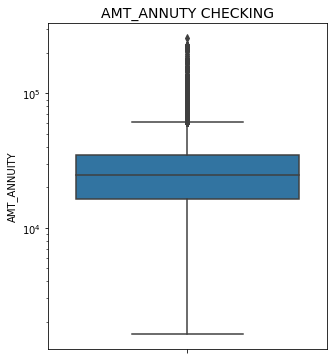

In [14]:
#Box plotting of AMT_ANNUITY column to detect outliers

plt.figure(figsize=(5,6))
sns.boxplot(y=inp0.AMT_ANNUITY)
plt.yscale('log')
plt.title("AMT_ANNUTY CHECKING",fontsize=14)
plt.show()

In [15]:
#Mean, median and other infos of column AMT_ANNUITY

print("Mean:",inp0.AMT_ANNUITY.mean())
print("Median:",inp0.AMT_ANNUITY.median())
print(inp0.AMT_ANNUITY.describe())

Mean: 27108.573909183444
Median: 24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [16]:
#Filling the missing values with median in column AMT_ANNUITY since this column contains outliers

inp0.AMT_ANNUITY.fillna(value = inp0.AMT_ANNUITY.median(), inplace =True)

In [17]:
inp0.AMT_ANNUITY.isnull().sum()

0

#### AMT_GOODS_PRICE CHECKING

In [18]:
#Verifying the count of missing value for AMT_GOODS_PRICE column
inp0.AMT_GOODS_PRICE.isnull().sum()

278

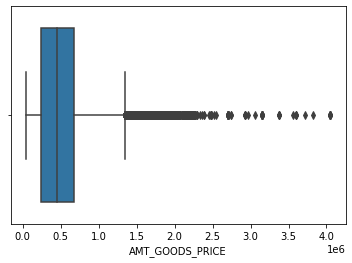

In [19]:
#Box plotting of AMT_GOODS_PRICE column to detect outliers
sns.boxplot(inp0.AMT_GOODS_PRICE)
plt.show()

In [20]:
#Mean, median and other infos of column AMT_ANNUITY

print("Mean:",inp0.AMT_GOODS_PRICE.mean())
print("Median:",inp0.AMT_GOODS_PRICE.median())
print(inp0.AMT_GOODS_PRICE.describe())

Mean: 538396.2074288895
Median: 450000.0
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [21]:
#Filling the missing values with median in column AMT_GOODS_PRICE since this column contains outliers

inp0.AMT_GOODS_PRICE.fillna(value = inp0.AMT_GOODS_PRICE.median(), inplace =True)

In [22]:
inp0.AMT_GOODS_PRICE.isnull().sum()

0

#### NAME_TYPE_SUITE CHECKING

In [23]:
#Verifying the values for NAME_TYPE_SUITE column
inp0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [24]:
inp0.NAME_TYPE_SUITE.isnull().sum()

1292

In [25]:
#Filling the missing values with mode in column NAME_TYPE_SUITE since this column is a categorical column

inp0.NAME_TYPE_SUITE.fillna(value = inp0.NAME_TYPE_SUITE.mode()[0], inplace =True)

In [26]:
inp0.NAME_TYPE_SUITE.isnull().sum()

0

#### CNT_FAM_MEMBERS CHECKING

In [27]:
#Verifying the values for CNT_FAM_MEMBERS column
inp0.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [28]:
inp0.CNT_FAM_MEMBERS.isnull().sum()

2

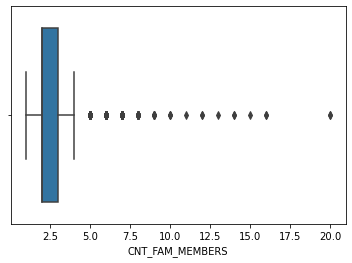

In [29]:
#Box plotting of CNT_FAM_MEMBERS column to detect outliers
sns.boxplot(inp0.CNT_FAM_MEMBERS)
plt.show()

In [30]:
#Mean, median and other infos of column CNT_FAM_MEMBERS

print("Mean:",inp0.CNT_FAM_MEMBERS.mean())
print("Median:",inp0.CNT_FAM_MEMBERS.median())
print(inp0.CNT_FAM_MEMBERS.describe())

Mean: 2.152665450442101
Median: 2.0
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [31]:
#Filling the missing values with MEDIAN in column CNT_FAM_MEMBERS since this column contains outliers

inp0.CNT_FAM_MEMBERS.fillna(value = inp0.CNT_FAM_MEMBERS.median(), inplace =True)

In [32]:
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

#### EXT_SOURCE_2 CHECKING

In [33]:
inp0.EXT_SOURCE_2.isnull().sum()

660

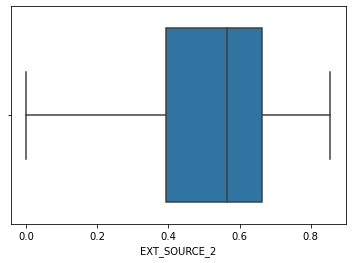

In [34]:
sns.boxplot(inp0.EXT_SOURCE_2)
plt.show()

In [35]:
#Mean, median and other infos of column CNT_FAM_MEMBERS

print("Mean:",inp0.EXT_SOURCE_2.mean())
print("Median:",inp0.EXT_SOURCE_2.median())
print(inp0.EXT_SOURCE_2.describe())

Mean: 0.5143926741308463
Median: 0.5659614260608526
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


In [36]:
#Filling the missing values with MEAN in column CNT_FAM_MEMBERS since this column has no outliers

inp0.EXT_SOURCE_2.fillna(value = round(inp0.EXT_SOURCE_2.mean(),2), inplace =True)

In [37]:
inp0.EXT_SOURCE_2.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_XXXX CHECKING

In [38]:
inp0.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(dropna=False)

0.0     71801
1.0     63405
2.0     50192
NaN     41519
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [39]:
#Filling the missing values with mode in column NAME_TYPE_SUITE since this column are number of credit inquiries, 
#replacing missing values with the most frequent value would make more sense.

inp0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace =True)

In [40]:
inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(dropna=False)

0.0     113320
1.0      63405
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
25.0         1
23.0         1
22.0         1
21.0         1
20.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [41]:
#Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns 
#'AMT_REQ_CREDIT_BUREAU_MONTH', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
#'AMT_REQ_CREDIT_BUREAU_QRT' with the mode.

inp0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace =True)

inp0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace =True)

inp0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0], inplace =True)

inp0.AMT_REQ_CREDIT_BUREAU_MON.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_MON.mode()[0], inplace =True)

inp0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(value = inp0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0], inplace =True)

In [42]:
#Checking if the above columns have any null values

filter_AMT_REQ_CREDIT_BUREAU = [col for col in inp0 if col.startswith('AMT_REQ_CREDIT_BUREAU')]
inp0[filter_AMT_REQ_CREDIT_BUREAU].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

### Checking for errors in Data types and Data

#### DAYS_ Columns

In [43]:
#Checking the values present in columns starting with 'DAYS' for negative values
print(inp0['DAYS_BIRTH'].unique())
print(inp0['DAYS_EMPLOYED'].unique())
print(inp0['DAYS_REGISTRATION'].unique())
print(inp0['DAYS_ID_PUBLISH'].unique())
print(inp0['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [44]:
#Filtering columns starting with 'DAYS'
filter_Col = [col for col in inp0 if col.startswith('DAYS')]
filter_Col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [45]:
#Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
inp0[filter_Col]= abs(inp0[filter_Col])

print(inp0['DAYS_BIRTH'].unique())
print(inp0['DAYS_EMPLOYED'].unique())
print(inp0['DAYS_REGISTRATION'].unique())
print(inp0['DAYS_ID_PUBLISH'].unique())
print(inp0['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


#### CODE_GENDER Column

In [46]:
inp0.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [47]:
#Replacing XNA with F in CODE_GENDER
inp0.loc[inp0.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
inp0.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### ORGANIZATION_TYPE Column

In [48]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [49]:
#Replacing XNA with NaN in ORGANIZATION_TYPE Column
inp0 = inp0.replace('XNA',np.NaN)
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### Binning of Continuous Variables

In [50]:
#Binning 'AMT_INCOME_TOTAL' based on quantiles
inp0.loc[:,'AMT_INCOME_RANGE']=pd.qcut(inp0.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.25,0.50,0.75,1],labels=['Low','Medium','High','Very_High'])
inp0.AMT_INCOME_RANGE.head(11)

0          High
1     Very_High
2           Low
3        Medium
4        Medium
5           Low
6          High
7     Very_High
8           Low
9        Medium
10          Low
Name: AMT_INCOME_RANGE, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very_High']

In [51]:
#Binning 'AMT_CREDIT_RANGE' by creating various ranges
inp0.loc[:,'AMT_CREDIT_RANGE']=pd.qcut(inp0.loc[:,'AMT_CREDIT'],q=[0,0.25,0.50,0.75,1],labels=['Low','Medium','High','Very_High'])
inp0.AMT_CREDIT_RANGE.head(11)

0        Medium
1     Very_High
2           Low
3        Medium
4        Medium
5        Medium
6     Very_High
7     Very_High
8     Very_High
9        Medium
10         High
Name: AMT_CREDIT_RANGE, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very_High']

In [52]:
#Converting 'DAYS_BIRTH' to years

inp0.DAYS_BIRTH= (inp0.DAYS_BIRTH/365).astype(int)
inp0.DAYS_BIRTH.unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [53]:
#Binning 'DAYS_BIRTH' based on quantiles

inp0['DAYS_BIRTH_BINS']=pd.cut(inp0['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Young_Adult','Adult', 'Middle_Age', 'Senior_Citizen'])
inp0.DAYS_BIRTH_BINS.value_counts()

Middle_Age        185900
Adult              75925
Senior_Citizen     29368
Young_Adult        16318
Name: DAYS_BIRTH_BINS, dtype: int64

In [54]:
inp0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Medium,Young_Adult
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very_High,Very_High,Middle_Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle_Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Medium,Middle_Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Medium,Middle_Age
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Low,Medium,Middle_Age
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,37,3130,1213.0,619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,High,Very_High,Mi

## 3. Analysis of the Data

### 3.1 Checking outliers

<function matplotlib.pyplot.show(close=None, block=None)>

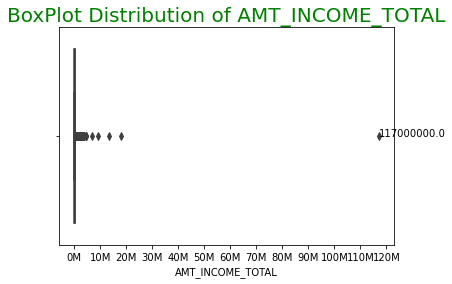

In [55]:
#Checking outliers in column 'AMT_INCOME_TOTAL'

sns.boxplot(inp0.AMT_INCOME_TOTAL)
plt.title('BoxPlot Distribution of AMT_INCOME_TOTAL', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
ticks = np.arange(0, 130000000, 10000000)
labels=['{}M'.format(i//1000000) for i in ticks]
maxVal=inp0.AMT_INCOME_TOTAL.max()
plt.xticks(ticks, labels)
plt.text(int(maxVal),0,maxVal)
plt.show

**Inference:**
- Tells us about the outliers in AMT_INCOME_TOTAL cloumn of the customers.
- 117M, the highest salary is an outlier.

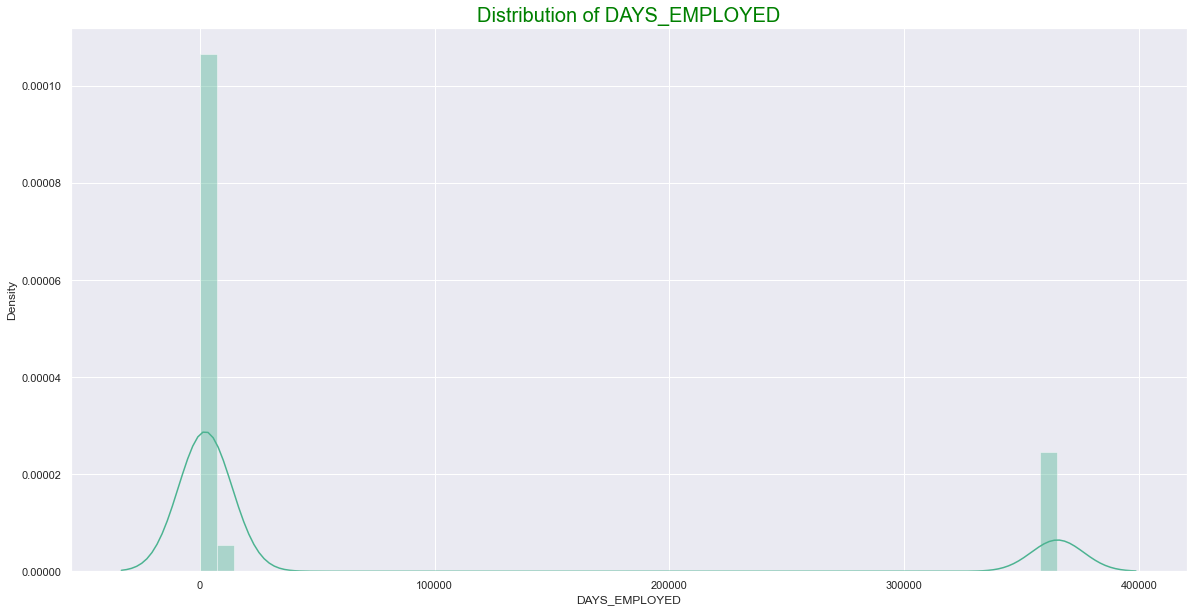

In [56]:
#Checking of Distribution of 'DAYS_EMPLOYED'

sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(inp0['DAYS_EMPLOYED'], color="#4CB391" )
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'} )
plt.show()

**Inference:**
- Tells us about the outliers present in DAYS_EMPLOYED column.
- Here we can take anything greater than 20,000 as an outlier since its more than 50 years. Considering a person
     will be over 70 years of age if that person starts working at 20 years old.

<function matplotlib.pyplot.show(close=None, block=None)>

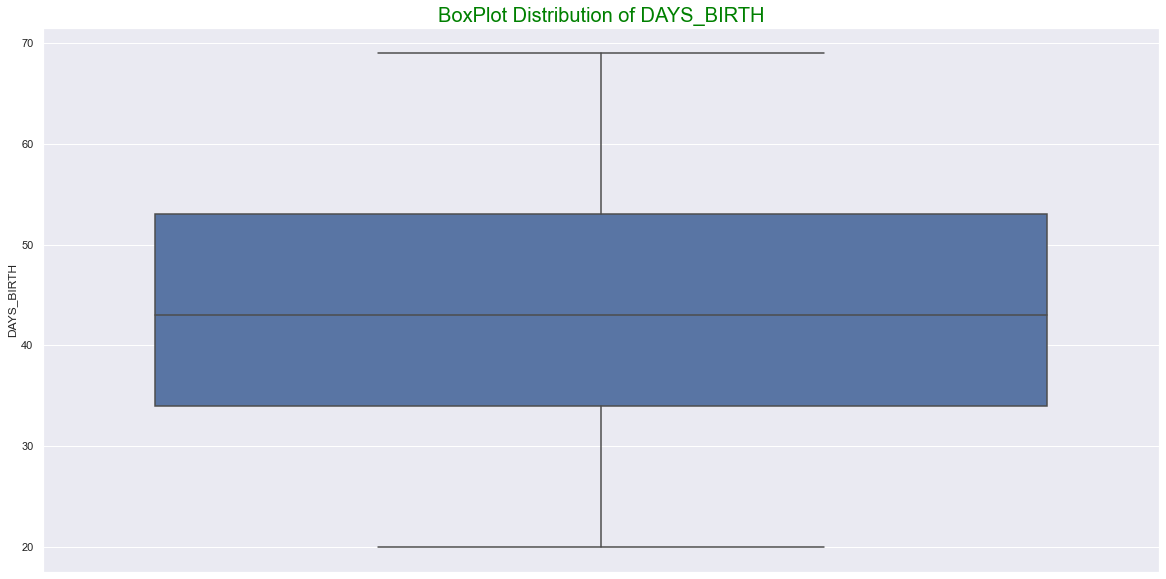

In [57]:
#Checking outliers in column 'AMT_INCOME_TOTAL'

sns.boxplot(data=inp0, y='DAYS_BIRTH')
plt.title('BoxPlot Distribution of DAYS_BIRTH', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show

**Inference:**
- No outliers present in DAYS_BIRTH column.

<function matplotlib.pyplot.show(close=None, block=None)>

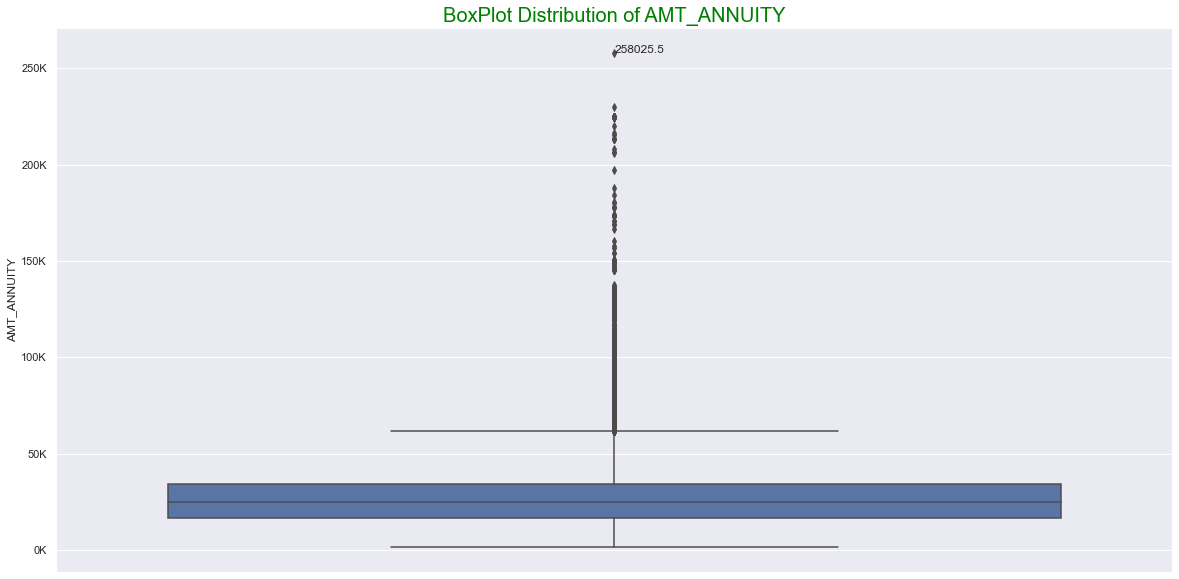

In [58]:
#Checking outliers in column 'AMT_ANNUITY'

sns.boxplot(data=inp0, y='AMT_ANNUITY')
plt.title('BoxPlot Distribution of AMT_ANNUITY', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
ticks = np.arange(0, 300000, 50000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
maxVal=inp0.AMT_ANNUITY.max()
plt.text(0,int(maxVal),maxVal)
plt.show

**Inference:**
- Tells us about the outliers present in AMT_ANNUITY column.
- Here we can take 258025.5 as an outlier.

<function matplotlib.pyplot.show(close=None, block=None)>

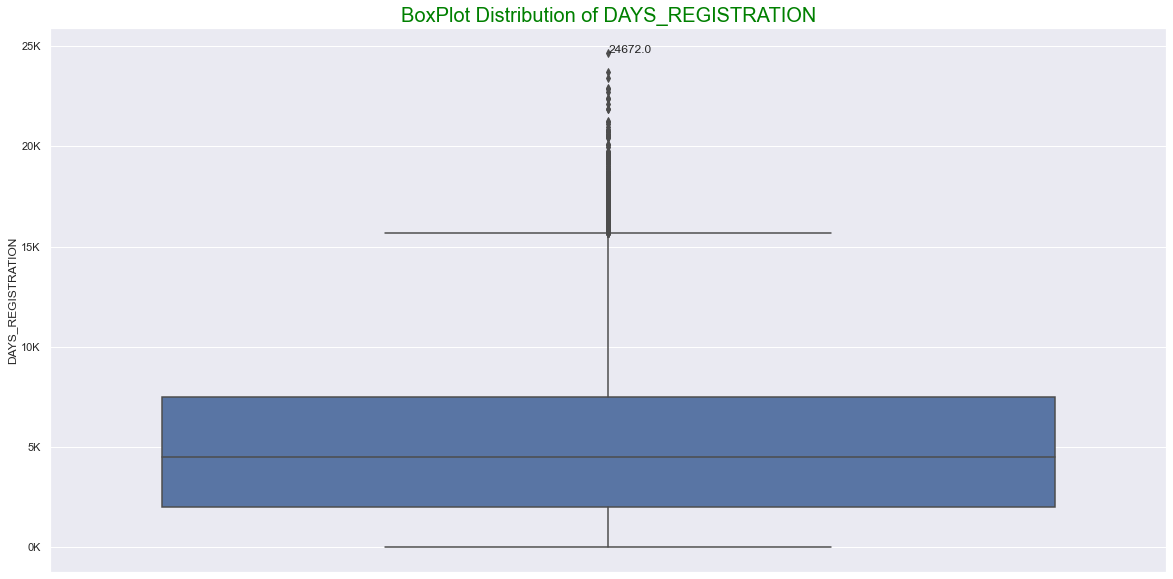

In [59]:
#Checking outliers in column 'DAYS_REGISTRATION'

sns.boxplot(data=inp0, y='DAYS_REGISTRATION')
plt.title('BoxPlot Distribution of DAYS_REGISTRATION', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
ticks = np.arange(0, 30000, 5000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
maxVal=inp0.DAYS_REGISTRATION.max()
plt.text(0,int(maxVal),maxVal)
plt.show

**Inference:**
- No outliers present in DAYS_REGISTRATION column.

### 3.2 Checking the distribution of data in the Data Set

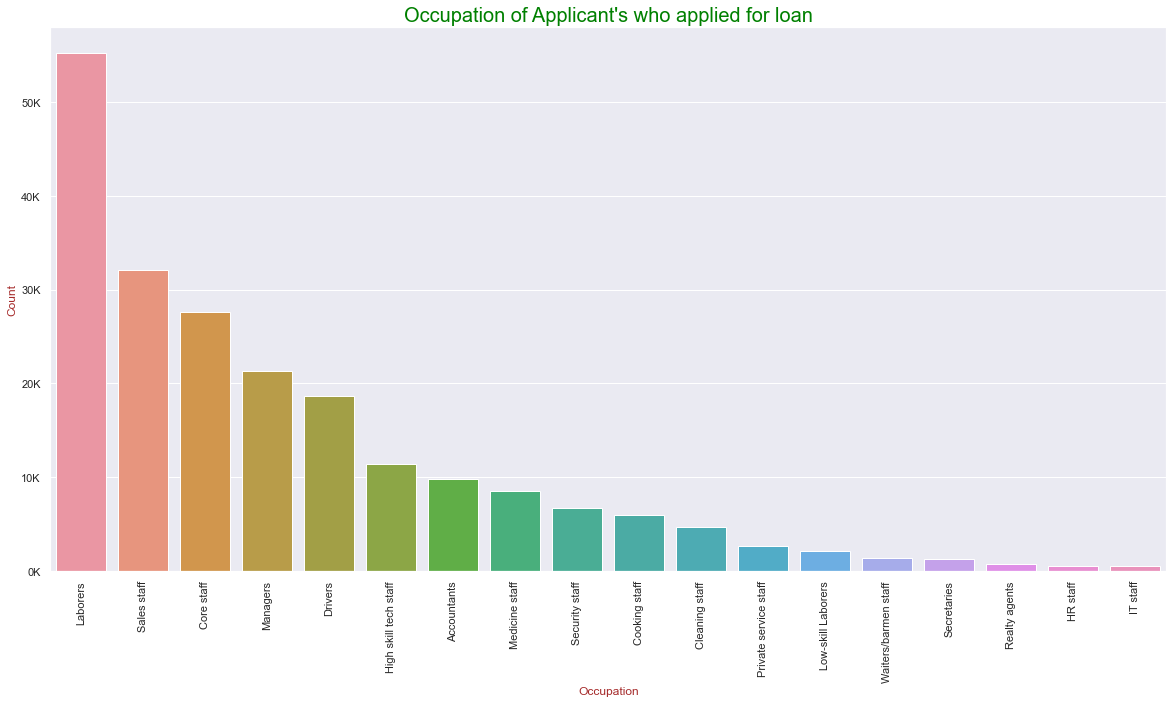

In [60]:
# Distribution of 'OCCUPATION_TYPE'

sns.countplot(data=inp0, x='OCCUPATION_TYPE', order=inp0.OCCUPATION_TYPE.value_counts().index)
plt.title('Occupation of Applicant\'s who applied for loan', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Occupation", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 60000, 10000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90)
plt.show()

**Inference:**
- Tells us about the distribution of occupation among the customers present in OCCUPATION_TYPE column.
- Labourers, Sales Staff and Core Staff constitutes the major occupation whereas IT Staff is on the minor side.

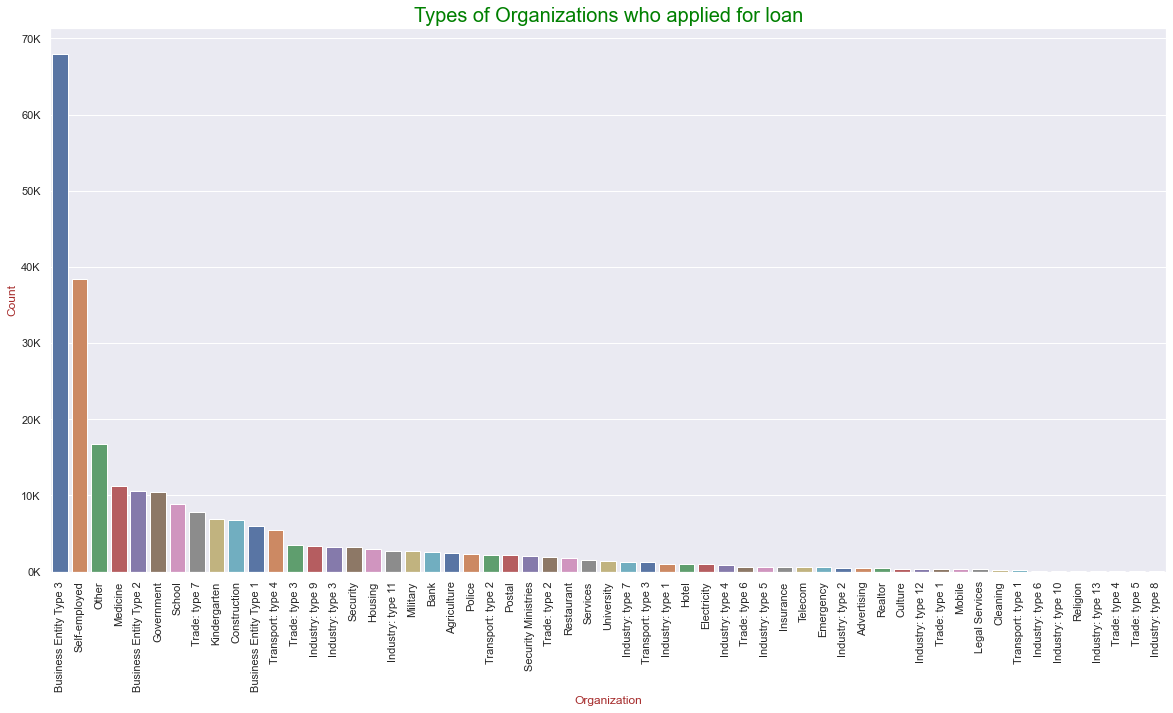

In [61]:
# Distribution of 'ORGANIZATION_TYPE'
sns.countplot(data=inp0, x='ORGANIZATION_TYPE', order=inp0.ORGANIZATION_TYPE.value_counts().index, palette='deep')
plt.title('Types of Organizations who applied for loan', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Organization", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 80000, 10000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.xticks(rotation = 90)
plt.yticks(ticks, labels)
plt.show()

**Inference:**
- Tells us about the which organization have majority loans in ORGANIZATION_TYPE column.
- Business Entity Type 3 organizations have majority of the loan applications.

### 3.3 Checking of Imbalance in the Data Set

#### TARGET VARIABLE

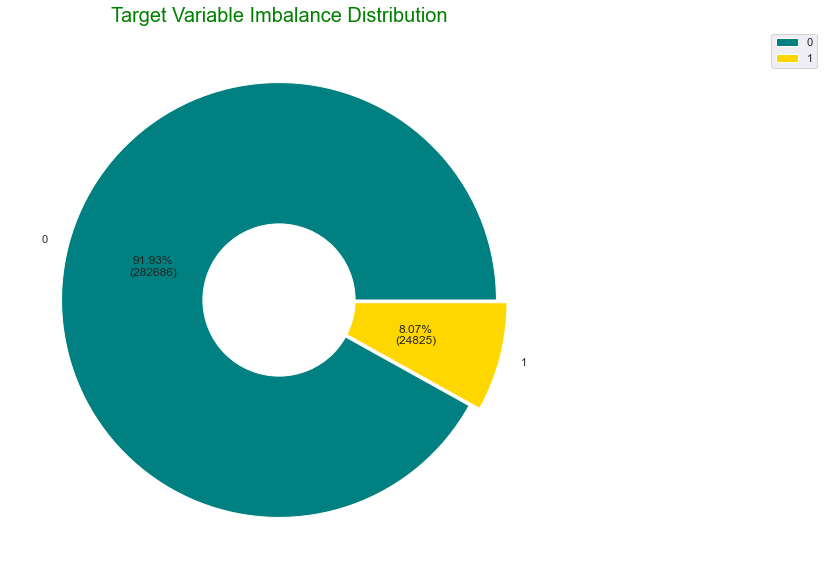

In [62]:
#Distribution of 'TARGET' Variable Imbalance 

total = len(inp0.TARGET)
explode = [0, 0.05]

def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.title('Target Variable Imbalance Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
inp0.TARGET.value_counts().plot.pie(autopct = pcentFormat, colors = ['teal', 'gold'], explode = explode)

centre_circle = plt.Circle((0,0),0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))

plt.show()

**Inference:**
- High imbalance is seen between the 'TARGET' variables.

### 3.4 Univariate Analysis

In [63]:
#Dividing the original dataset into two different datasets depending upon the target value
target0 = inp0.loc[inp0.TARGET == 0]
target1 = inp0.loc[inp0.TARGET == 1]

#### GENDER DISTRIBUTION

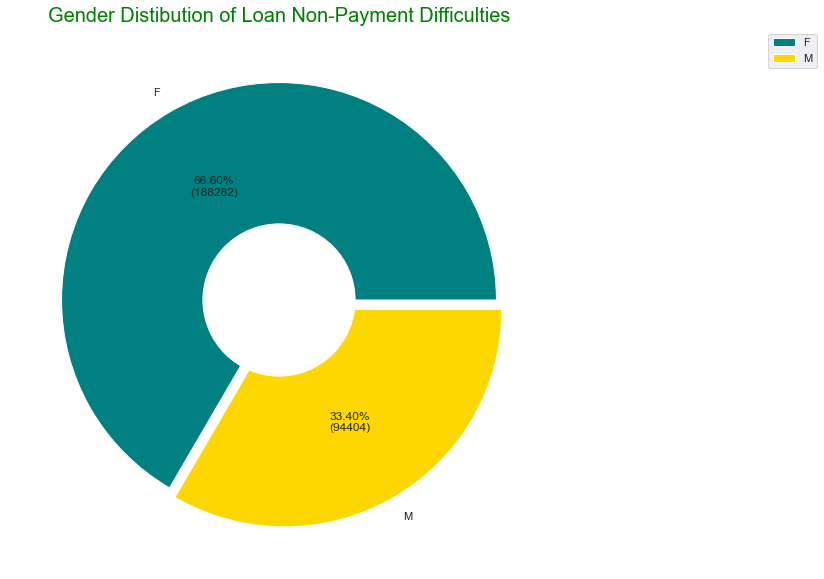

In [64]:
#Distribution of 'CODE_GENDER' of Loan Non-Payment Difficulties 

total = len(target0.CODE_GENDER)
explode = [0, 0.05]

def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.title('Gender Distibution of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
target0.CODE_GENDER.value_counts().plot.pie(autopct = pcentFormat, colors = ['teal', 'gold'], explode = explode)

centre_circle = plt.Circle((0,0),0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))

plt.show()

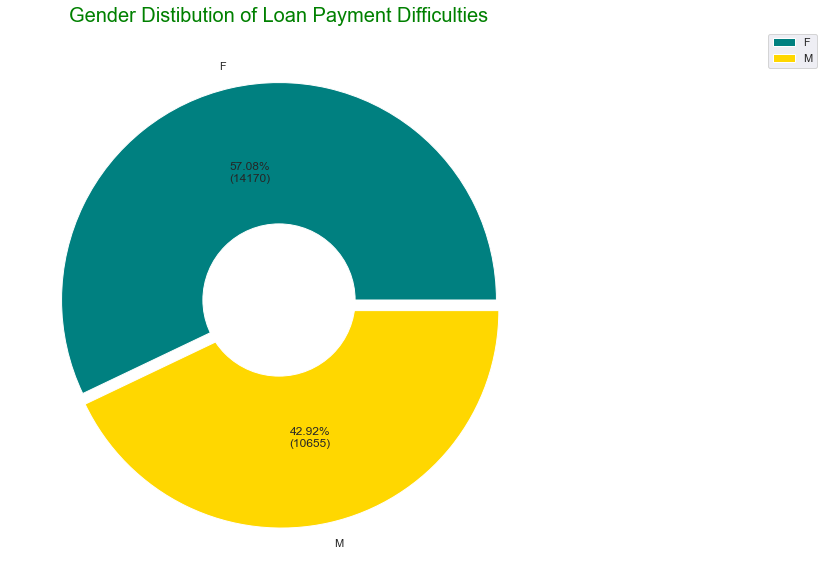

In [65]:
#Distribution of 'CODE_GENDER' of Loan Payment Difficulties 

total = len(target1.CODE_GENDER)
explode = [0, 0.05]

def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.title('Gender Distibution of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
target1.CODE_GENDER.value_counts().plot.pie(autopct = pcentFormat, colors = ['teal', 'gold'], explode = explode)

centre_circle = plt.Circle((0,0),0.35, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))

plt.show()

**Inference:**
- On the basis of gender, Female group is majority in both Loan Payment Difficulties and Loan Non-Payment Difficulties.
- There is an increase in the percentage of Male group in Loan Payment Difficulties from Loan Non-Payment Difficulties.

#### INCOME SOURCE DISTRIBUTION

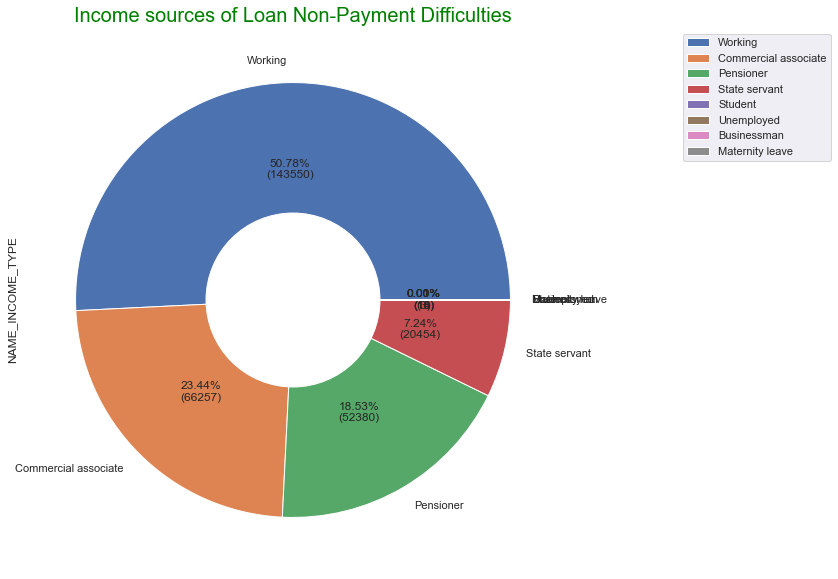

In [66]:
#Distribution of 'NAME_INCOME_TYPE' of Loan Non-Payment Difficulties 

total = len(target0.NAME_INCOME_TYPE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target0.NAME_INCOME_TYPE.value_counts(normalize= True).plot.pie(autopct = pcentFormat)

plt.title('Income sources of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

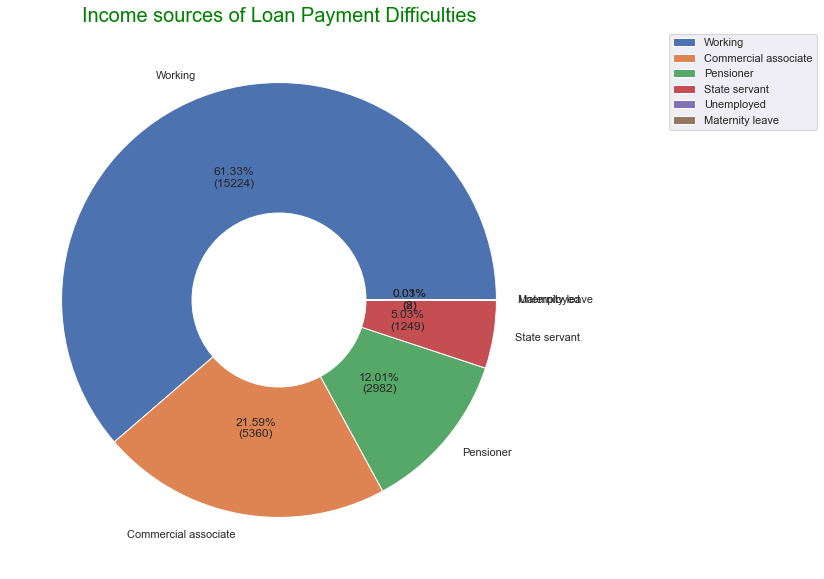

In [67]:
#Distribution of 'NAME_INCOME_TYPE' of Loan Payment Difficulties 
total = len(target1.NAME_INCOME_TYPE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target1.NAME_INCOME_TYPE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Income sources of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')

plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

**Inference:**
- There is a decrease in the percentage of Loan Payment Difficulties who are Pensioners.
- There is an increase in the percentage of Loan Payment Difficulties who are Working when compared the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

#### FAMILY STATUS DISTRIBUTION

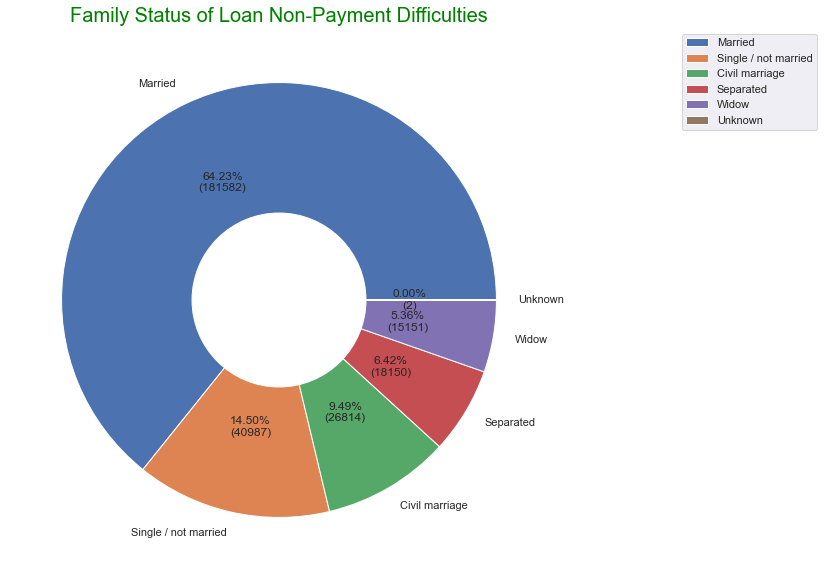

In [68]:
#Distribution of 'NAME_FAMILY_STATUS' of Loan Non-Payment Difficulties 
total = len(target0.NAME_FAMILY_STATUS)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target0.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Family Status of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

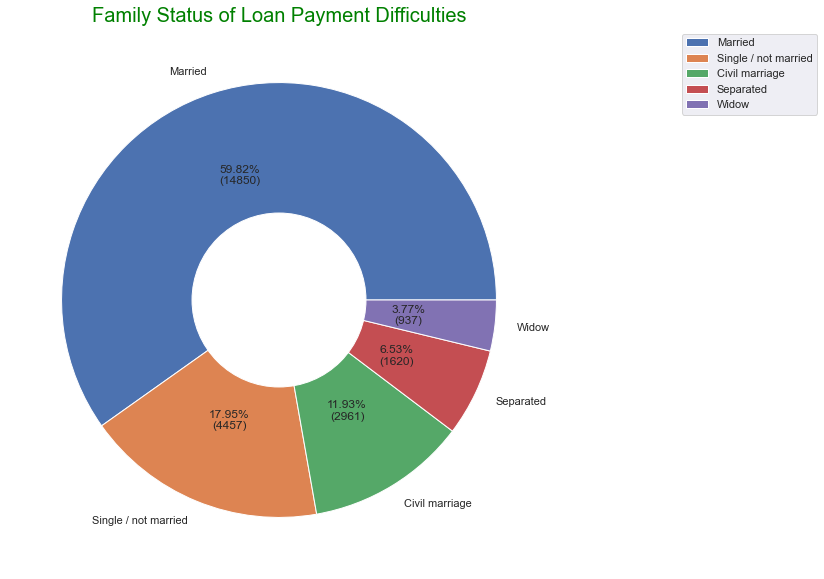

In [69]:
#Distribution of 'NAME_FAMILY_STATUS' of Loan Payment Difficulties 
total = len(target1.NAME_FAMILY_STATUS)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target1.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Family Status of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

**Inference:**
- There is a decrease in the percentage of Loan Payment Difficulties who are Married and Widowed.
- There is an increase in the percentage of Loan Payment Difficulties who are Single and Civil Married when compared the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

#### EDUCATION STATUS DISTRIBUTION 

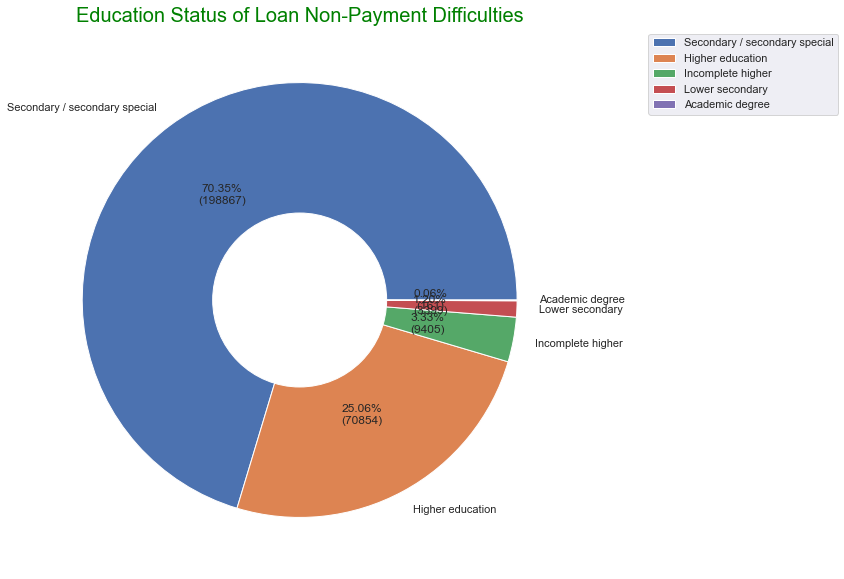

In [70]:
#Distribution of 'NAME_EDUCATION_TYPE' of Loan Non-Payment Difficulties 
total = len(target0.NAME_EDUCATION_TYPE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target0.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Education Status of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

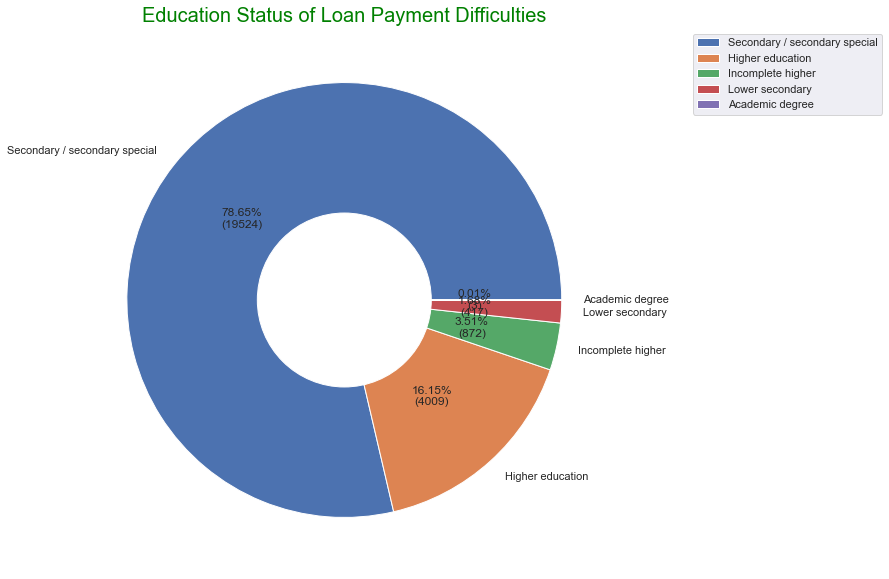

In [71]:
#Distribution of 'NAME_EDUCATION_TYPE' of Loan Payment Difficulties 
total = len(target1.NAME_EDUCATION_TYPE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target1.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Education Status of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

**Inference:**
- There is a decrease in the percentage of Loan Payment Difficulties who have completed Secondary/Secondary Special.
- There is an increase in the percentage of Loan Payment Difficulties who have completed Higher Education when compared the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

#### INCOME RANGE DISTRIBUTION

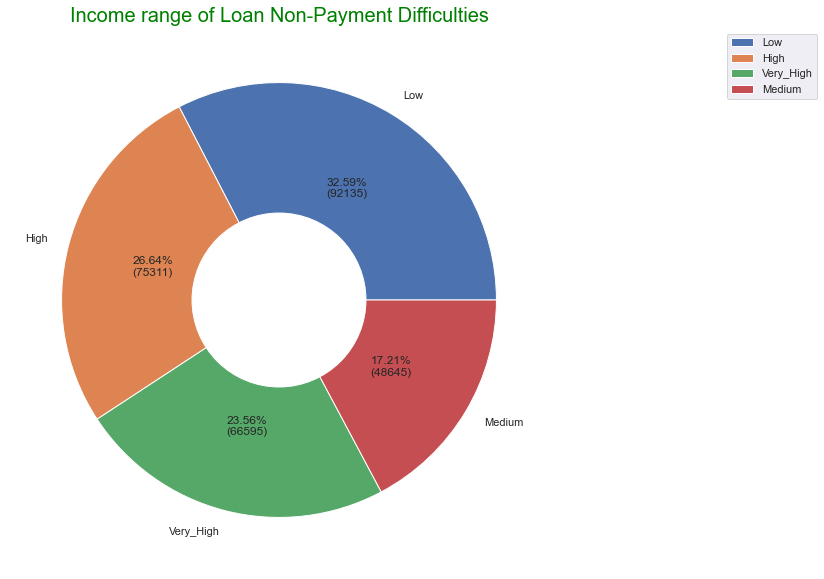

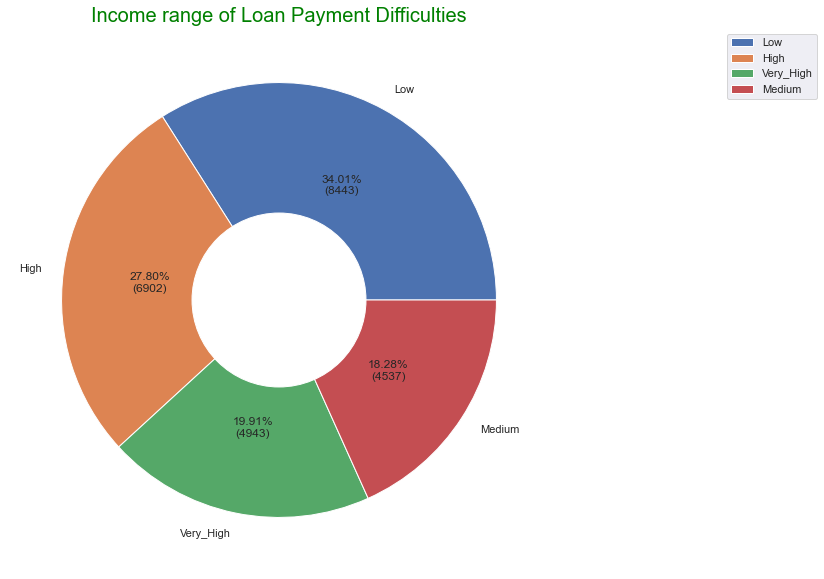

In [72]:
#Distribution of 'AMT_INCOME_RANGE' of Loan Non-Payment Difficulties 
total = len(target0.AMT_INCOME_RANGE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target0.AMT_INCOME_RANGE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Income range of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

#Distribution of 'AMT_INCOME_RANGE' of Loan Payment Difficulties 
total = len(target1.AMT_INCOME_RANGE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target1.AMT_INCOME_RANGE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Income range of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()


**Inference:**
- There is an increase in the percentage of Loan Payment Difficulties whose Income is Low when compared the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

#### AGE DISTRIBUTION

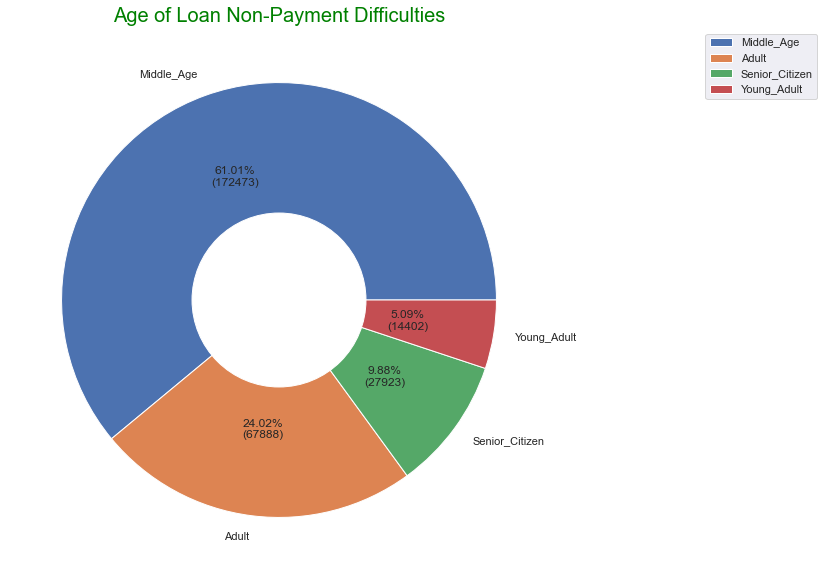

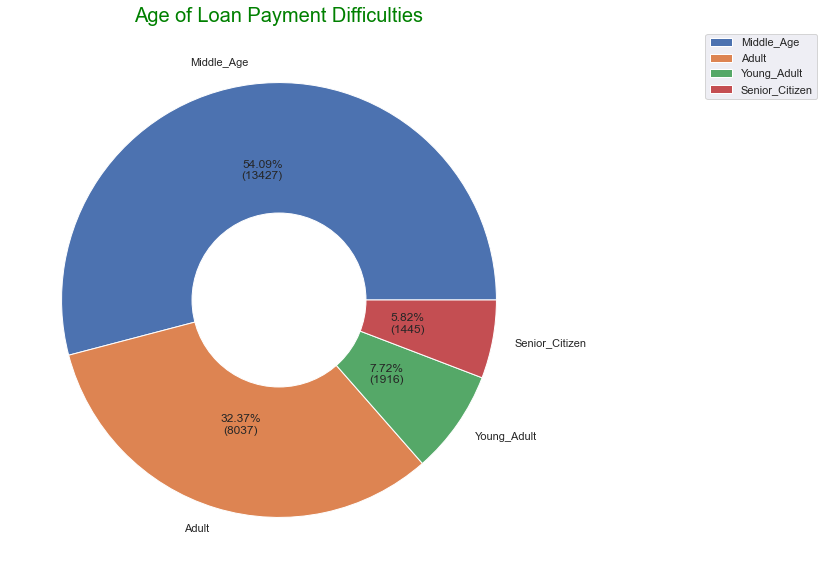

In [73]:
#Distribution of 'DAYS_BIRTH' of Loan Non-Payment Difficulties 
total = len(target0.DAYS_BIRTH_BINS)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target0.DAYS_BIRTH_BINS.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Age of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

#Distribution of 'DAYS_BIRTH' of Loan Payment Difficulties 
total = len(target1.DAYS_BIRTH_BINS)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target1.DAYS_BIRTH_BINS.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Age of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()


**Inference:**
- There is an increase in the percentage of Loan Payment Difficulties who are young in age when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

#### TYPE OF LOANS DISTRIBUTION

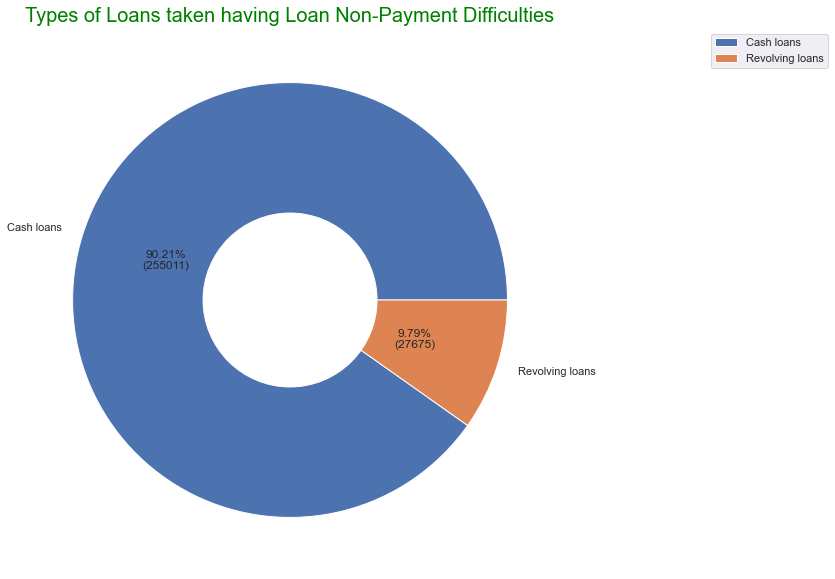

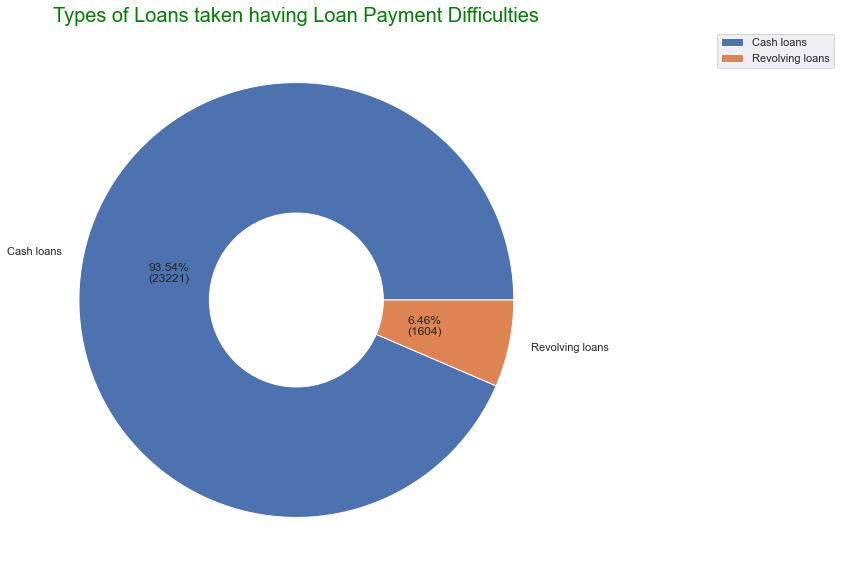

In [74]:
#Distribution of 'NAME_CONTRACT_TYPE' of Loan Non-Payment Difficulties 
total = len(target0.NAME_CONTRACT_TYPE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target0.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Types of Loans taken having Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()

#Distribution of 'NAME_CONTRACT_TYPE' of Loan Payment Difficulties 
total = len(target1.NAME_CONTRACT_TYPE)
def pcentFormat(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

target1.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.pie(autopct=pcentFormat)

plt.title('Types of Loans taken having Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

centre_circle = plt.Circle((0,0),.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.ylabel('')
plt.legend(loc=0, bbox_to_anchor=(1.5, 1))
plt.show()


**Inference:**
- Cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans.

#### ORGANIZATION TYPE DISTRIBUTION

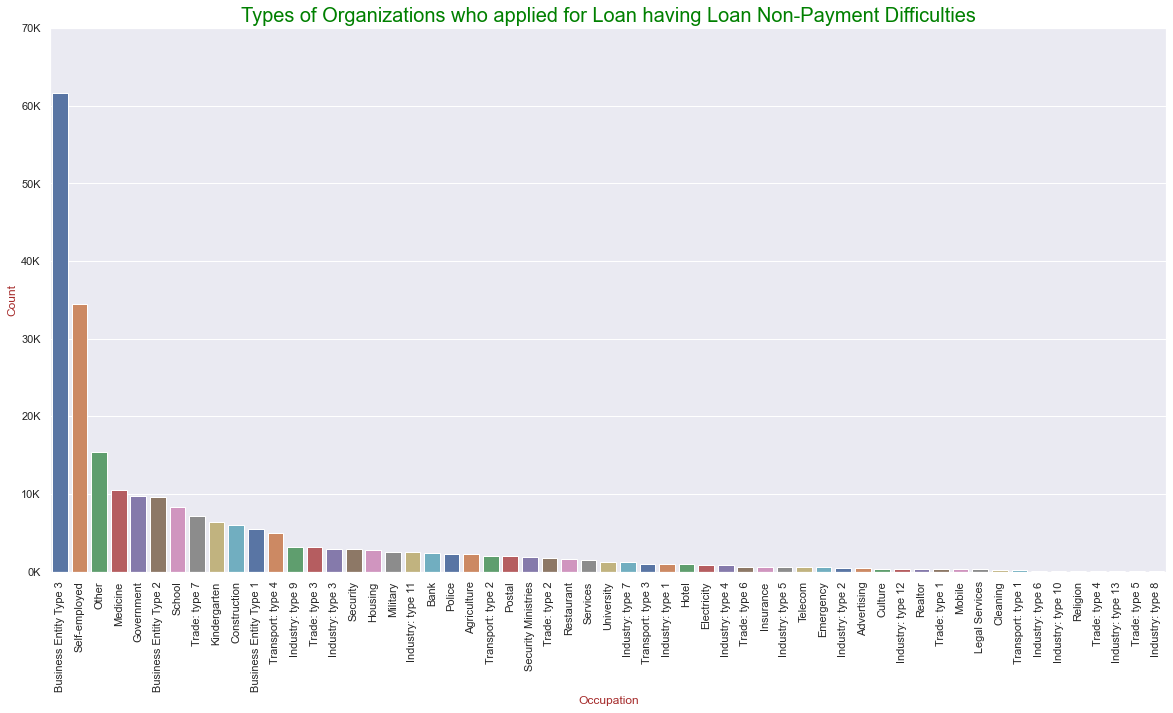

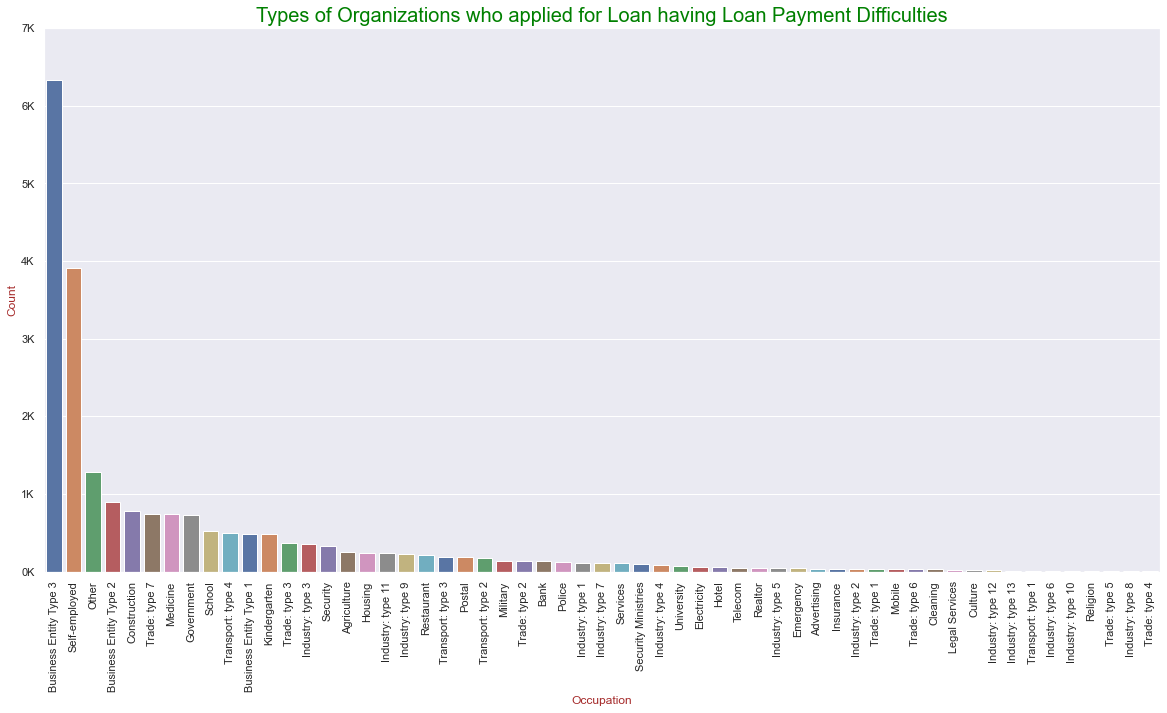

In [75]:
#Distribution of 'ORGANIZATION_TYPE' of Loan Non-Payment Difficulties
sns.countplot(data=target0, x='ORGANIZATION_TYPE', order=target0.ORGANIZATION_TYPE.value_counts().index, palette='deep')
plt.title('Types of Organizations who applied for Loan having Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Occupation", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 80000, 10000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90)
plt.show()

#Distribution of 'ORGANIZATION_TYPE' of Loan Payment Difficulties
sns.countplot(data=target1, x='ORGANIZATION_TYPE', order=target1.ORGANIZATION_TYPE.value_counts().index, palette='deep')
plt.title('Types of Organizations who applied for Loan having Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Occupation", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 8000, 1000)
labels=['{}K'.format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90)
plt.show()

**Inference:**
- No major changes can be observed here.

### 3.5 Bivariate Analysis

#### 3.5.1 Bivariate Analysis of Categorical vs Numerical Variables

<function matplotlib.pyplot.show(close=None, block=None)>

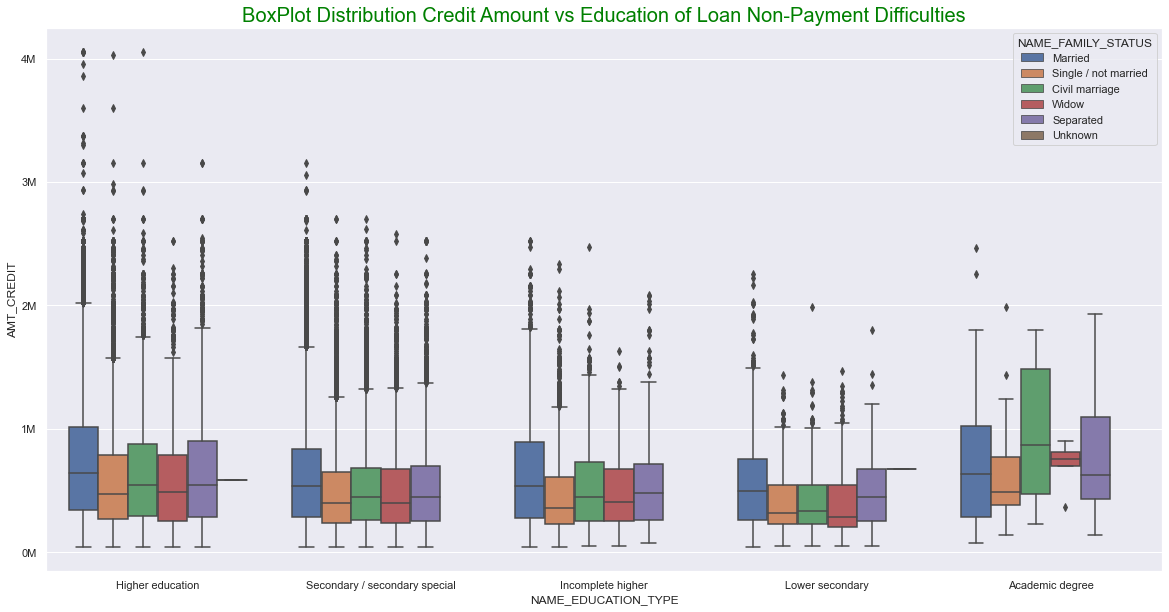

In [76]:
#Distribution AMT_CREDIT vs NAME_EDUCATION_TYPE of Loan Non-Payment Difficulties

sns.boxplot(target0.NAME_EDUCATION_TYPE, target0.AMT_CREDIT, target0.NAME_FAMILY_STATUS)
plt.title('BoxPlot Distribution Credit Amount vs Education of Loan Non-Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
ticks = np.arange(0, 5000000, 1000000)
labels=['{}M'.format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

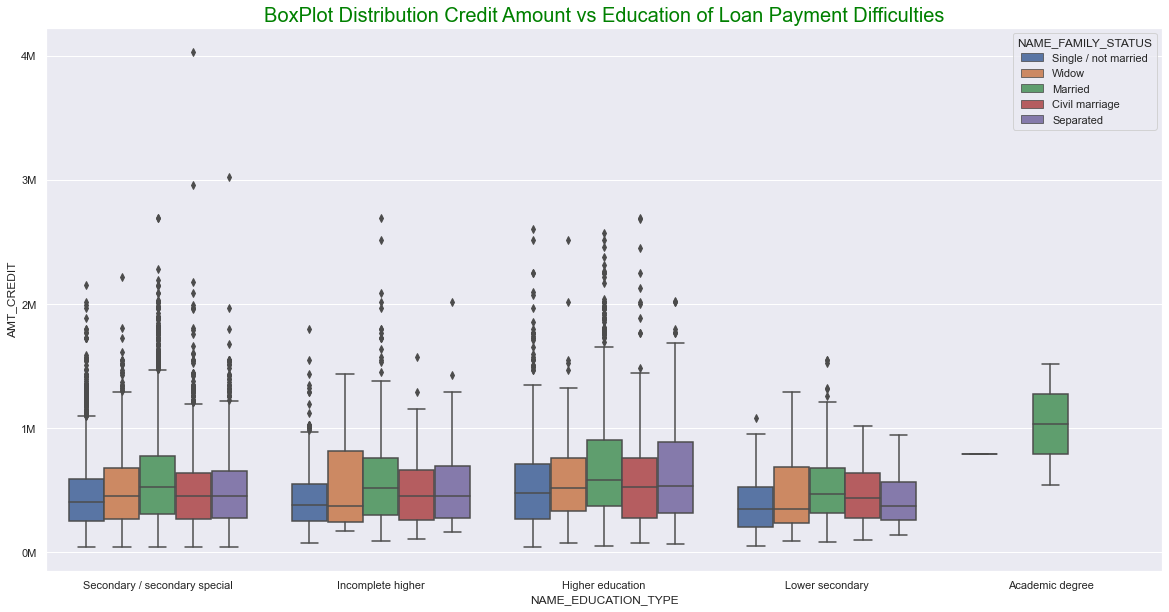

In [77]:
#Distribution AMT_CREDIT vs NAME_EDUCATION_TYPE of Loan Payment Difficulties

sns.boxplot(target1.NAME_EDUCATION_TYPE, target1.AMT_CREDIT, target1.NAME_FAMILY_STATUS)
plt.title('BoxPlot Distribution Credit Amount vs Education of Loan Payment Difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
ticks = np.arange(0, 5000000, 1000000)
labels=['{}M'.format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)
plt.show

**Inference:**
- The graphs for Loan Payment Difficulties and Loan Non-Payment Difficulties appears to be similar.
- Family status of 'civil Marriage', 'Marriage' and 'Separated' of Academic degree education are having higher number of credits than others.
- Most of the outliers are from Education type 'Higher education' and 'Secondary'.
- Civil marriage for Academic degree is having most of the credits in the third quartile.

#### 3.5.2 Bivariate Analysis of Categorical-Categorical

#### INCOME RANGE

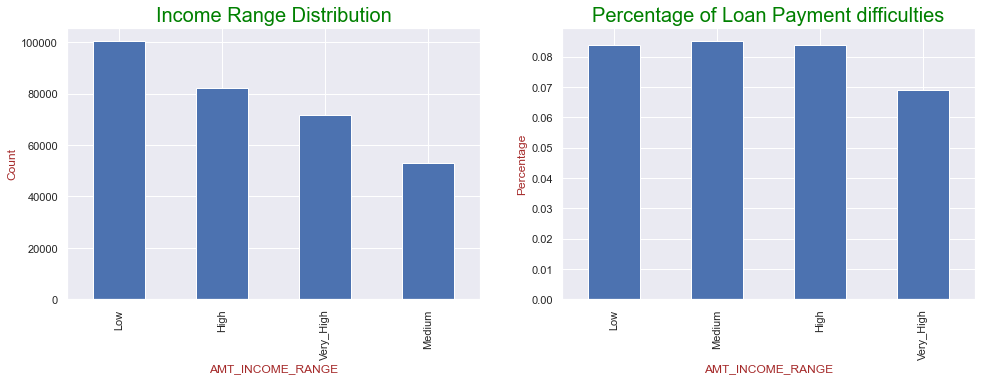

In [78]:
#Distribution of Income Range and the category with maximum Loan Payment Difficulties.

plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
inp0.AMT_INCOME_RANGE.value_counts().plot.bar()
plt.title('Income Range Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("AMT_INCOME_RANGE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplot(1, 2, 2)
inp0.groupby(['AMT_INCOME_RANGE'])['TARGET'].mean().plot.bar()
plt.title('Percentage of Loan Payment difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("AMT_INCOME_RANGE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplots_adjust(left=0)
plt.show()

**Inference:**
- The clients from the LOW income group have the highest percentage of Loan Payment Difficulties.

#### INCOME TYPE

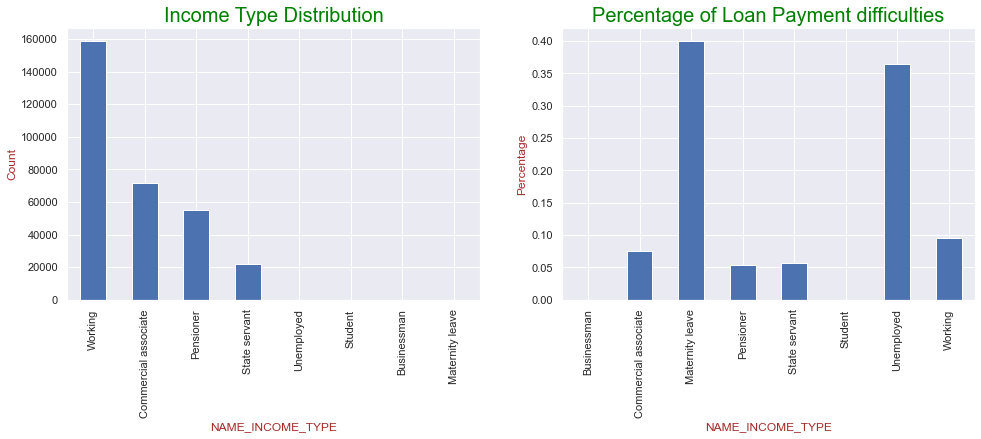

In [79]:
#Distribution of Income Type and the category with maximum Loan Payment Difficulties.

plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
inp0.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.title('Income Type Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("NAME_INCOME_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplot(1, 2, 2)
inp0.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.bar()
plt.title('Percentage of Loan Payment difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("NAME_INCOME_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplots_adjust(left=0)
plt.show()

**Inference:**
- The clients who are on Maternity Leave and Unemployed have the highest percentage of Loan Payment Difficulties.

#### CONTRACT TYPE

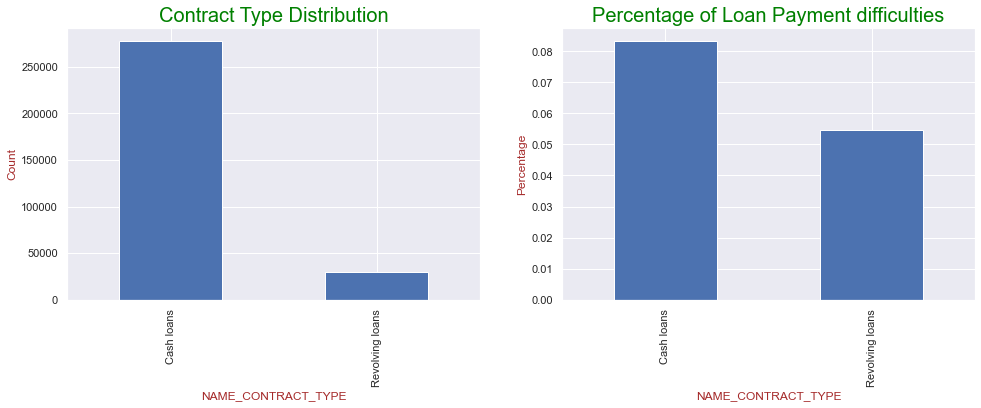

In [80]:
#Distribution of Contract Type and the category with maximum Loan Payment Difficulties.
plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
inp0.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title('Contract Type Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("NAME_CONTRACT_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplot(1, 2, 2)
inp0.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.bar()
plt.title('Percentage of Loan Payment difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("NAME_CONTRACT_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplots_adjust(left=0)
plt.show()

**Inference:**
- The clients who want Cash Loans have the highest percentage of Loan Payment Difficulties.

#### EDUCATION TYPE

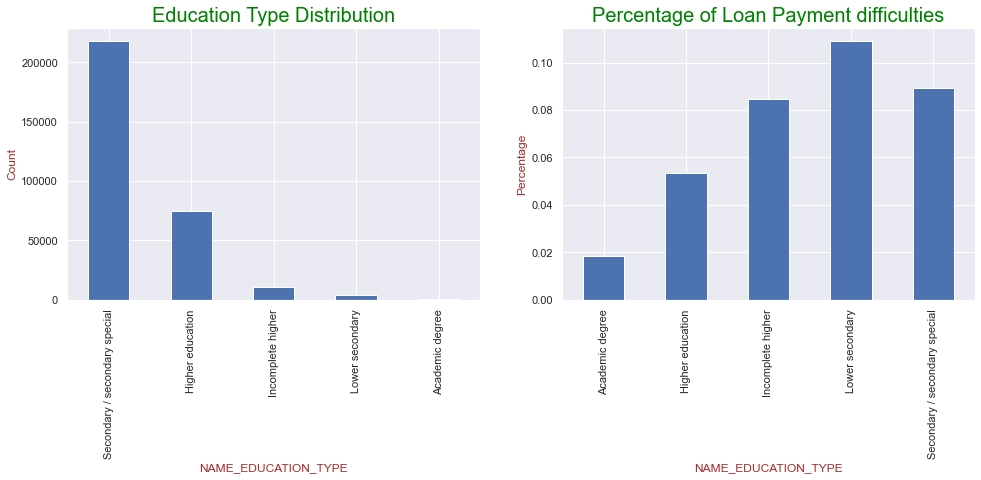

In [81]:
#Distribution of Education Type and the category with maximum Loan Payment Difficulties.
plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
inp0.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.title('Education Type Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("NAME_EDUCATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplot(1, 2, 2)
inp0.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.bar()
plt.title('Percentage of Loan Payment difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("NAME_EDUCATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplots_adjust(left=0)
plt.show()

**Inference:**
- The clients with Lower Secondary and Secondary/Secondary Special Education Type have the highest percentage of Loan Payment Difficulties.

#### OCCUPATION TYPE

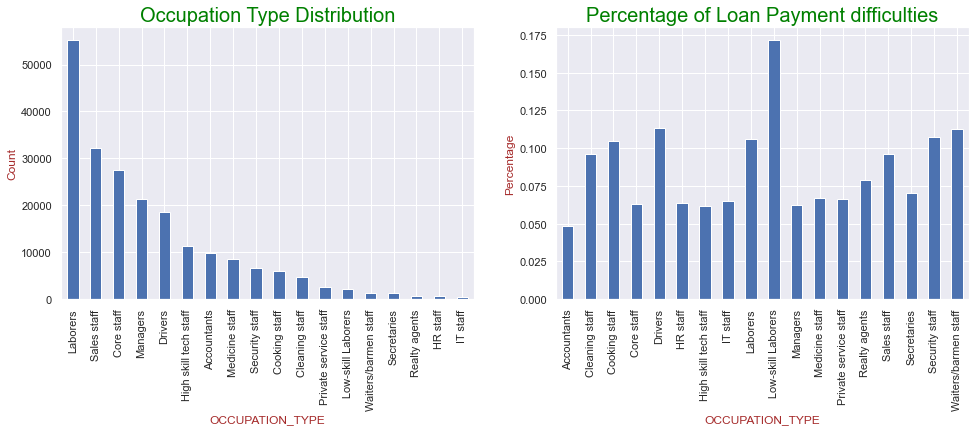

In [82]:
#Distribution of Occupation Type and the category with maximum Loan Payment Difficulties.
plt.figure(figsize=[14,5])
plt.subplot(1, 2, 1)
inp0.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title('Occupation Type Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("OCCUPATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplot(1, 2, 2)
inp0.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.bar()
plt.title('Percentage of Loan Payment difficulties', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("OCCUPATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplots_adjust(left=0)
plt.show()

**Inference:**
- The clients who are Low-Skill Laborers have the highest percentage of Loan Payment Difficulties.

#### 3.5.3 Bivariate Analysis of Numerical vs Numerical Variables

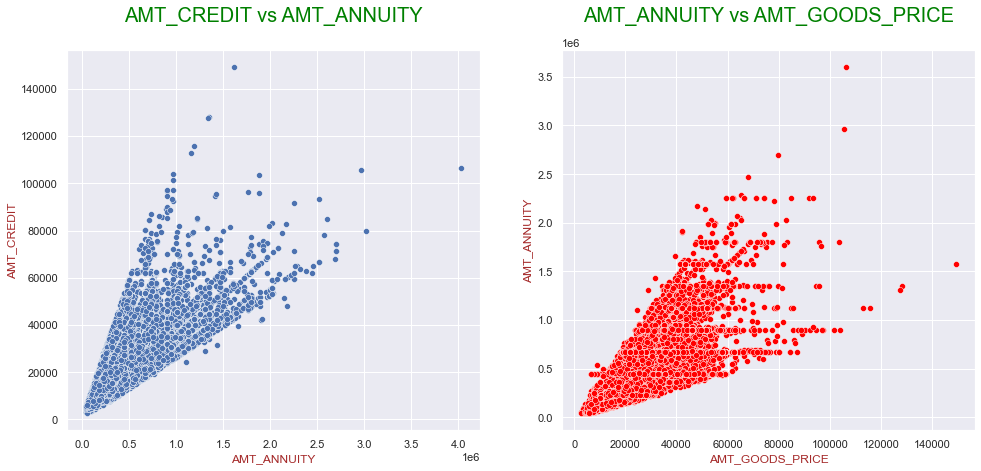

In [83]:
#ScatterPlot for Target variable of Loan Payment Difficulties

plt.figure(figsize=[14,7])
plt.subplot(1, 2, 1)
sns.scatterplot(x=target1.AMT_CREDIT ,y=target1.AMT_ANNUITY)
plt.title('AMT_CREDIT vs AMT_ANNUITY\n', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("AMT_ANNUITY", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("AMT_CREDIT", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplot(1, 2, 2)
sns.scatterplot(x=target1.AMT_ANNUITY ,y=target1.AMT_GOODS_PRICE,color="Red")
plt.title('AMT_ANNUITY vs AMT_GOODS_PRICE\n', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("AMT_GOODS_PRICE", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("AMT_ANNUITY", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.subplots_adjust(left=0)
plt.show()

**Inference:**
- AMT_CREDIT VS AMT_ANNUITY and AMT_ANNUITY VS AMT_GOODS_PRICE representing Bivariate Analysis for Target Variable.

### 3.6 Correlation Analysis

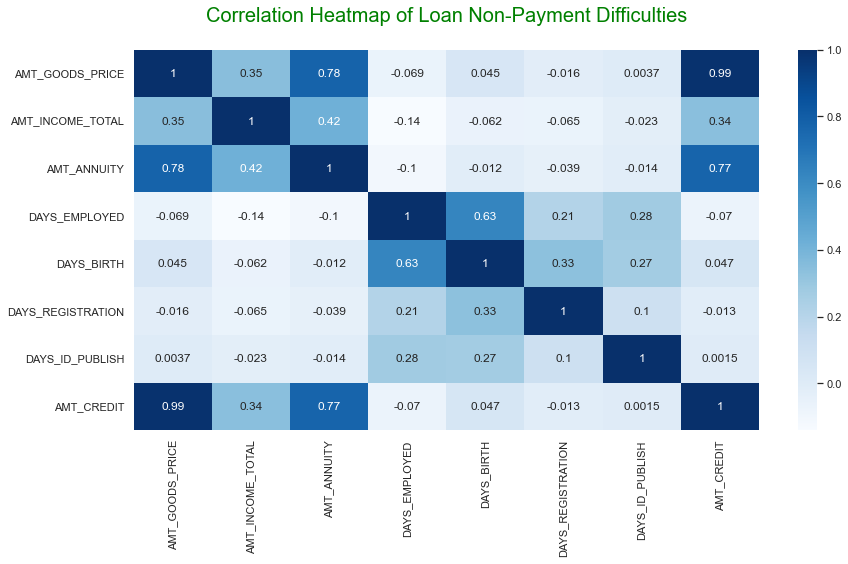

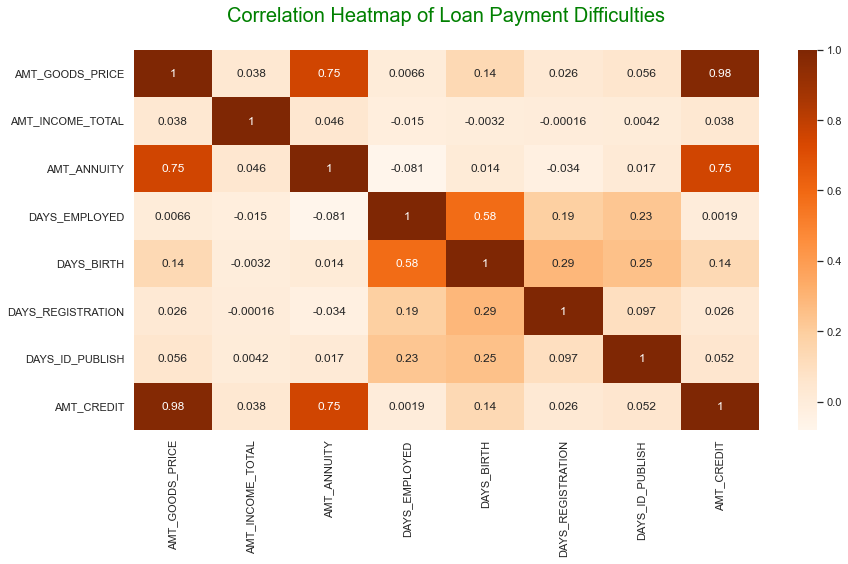

In [84]:
#Correlation Heatmap for Loan Non-Payment Difficulties
plt.figure(figsize=[14,7])
sns.heatmap(target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
                     'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',]].corr(), annot= True, cmap= "Blues")
plt.title('Correlation Heatmap of Loan Non-Payment Difficulties\n', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#Correlation Heatmap for Loan Payment Difficulties
plt.figure(figsize=[14,7])
sns.heatmap(target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
                     'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',]].corr(), annot= True, cmap= "Oranges")
plt.title('Correlation Heatmap of Loan Payment Difficulties\n', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

**Inference:**
- High correlation between Credit Amount and Goods Price.
- Some deviance appearing in the correlation of Loan Payment Difficulties and Loan Non-Payment Difficulties such as Credit Amount vs Income.

## 4. Importing the Previous Data Set

In [85]:
#Reading the data set of "previous_application" in inp0.
inp1=pd.read_csv("previous_application.csv")

In [86]:
#Print the head of the data frame.
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 4.1 Data Cleaning

In [87]:
#Filtering and Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
filterCol2 = [col for col in inp1 if col.startswith('DAYS')]
inp1[filterCol2]= abs(inp1[filterCol2])

#XNA and XAP values are replaced by NaN
inp1=inp1.replace('XNA', np.NaN)
inp1=inp1.replace('XAP', np.NaN)

In [88]:
#Print the head of the data frame.
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,NaN,Approved,73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,NaN,Approved,512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Some Univariate Analysis on the Previous Data Set

#### CONTRACT STATUS

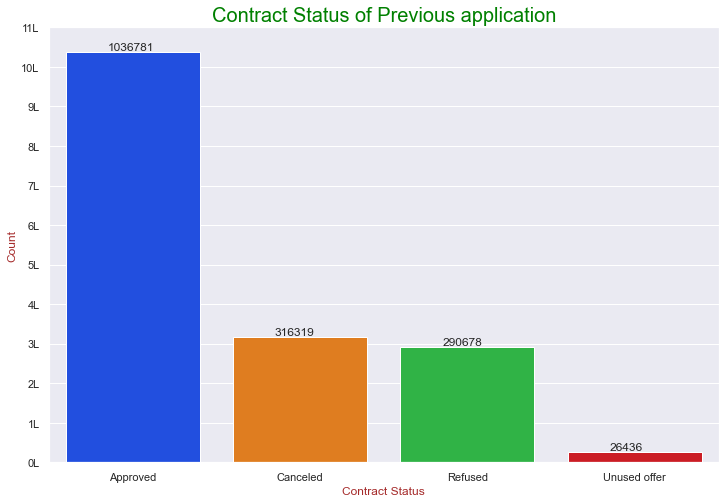

In [89]:
#Contract Status of Previous application

plt.figure(figsize=(12,8))
ax = sns.countplot(data=inp1, x='NAME_CONTRACT_STATUS', order=inp1.NAME_CONTRACT_STATUS.value_counts().index, palette='bright')
plt.title('Contract Status of Previous application', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Contract Status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 1200000, 100000)
labels=['{}L'.format(i//100000) for i in ticks]
plt.yticks(ticks, labels)


for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), va='bottom')

plt.show()

**Inference:**
- Majority of the loans were Approved
- Very less percentage of loans are Unused Offer

#### CLIENT TYPE

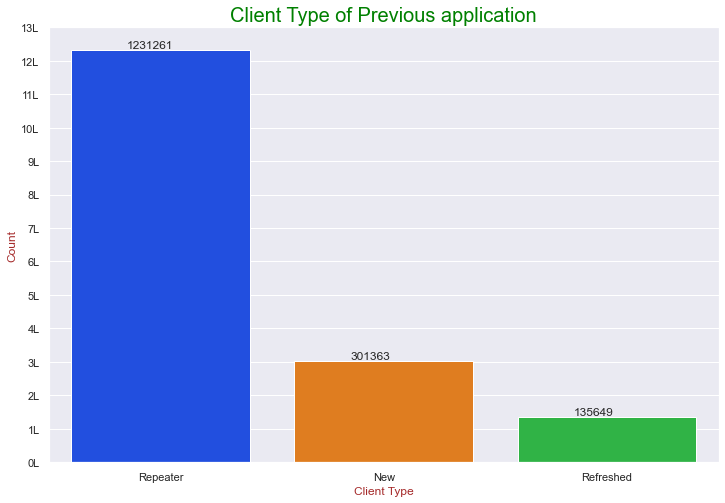

In [90]:
#Client Type of Previous application

plt.figure(figsize=(12,8))
ax = sns.countplot(data=inp1, x='NAME_CLIENT_TYPE', order=inp1.NAME_CLIENT_TYPE.value_counts().index, palette='bright')
plt.title('Client Type of Previous application', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Client Type", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 1400000, 100000)
labels=['{}L'.format(i//100000) for i in ticks]
plt.yticks(ticks, labels)


for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), va='bottom')

plt.show()

**Inference:**
- Majority of the loans were taken by repeated clients.

#### CLIENT PORTFOLIO

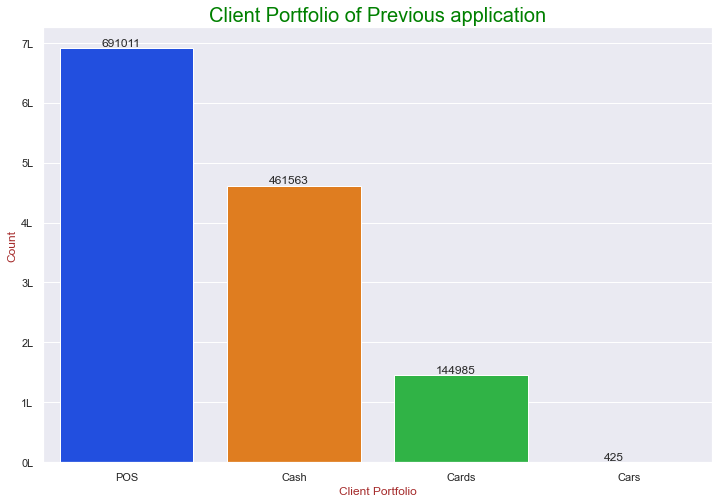

In [91]:
#Client Portfolio of Previous application

plt.figure(figsize=(12,8))
ax = sns.countplot(data=inp1, x='NAME_PORTFOLIO', order=inp1.NAME_PORTFOLIO.value_counts().index, palette='bright')
plt.title('Client Portfolio of Previous application', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Client Portfolio", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 800000, 100000)
labels=['{}L'.format(i//100000) for i in ticks]
plt.yticks(ticks, labels)


for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), va='bottom')

plt.show()

**Inference:**
- Majority of the Portfolio was POS and good amount of Cash.

#### TYPE OF GOODS

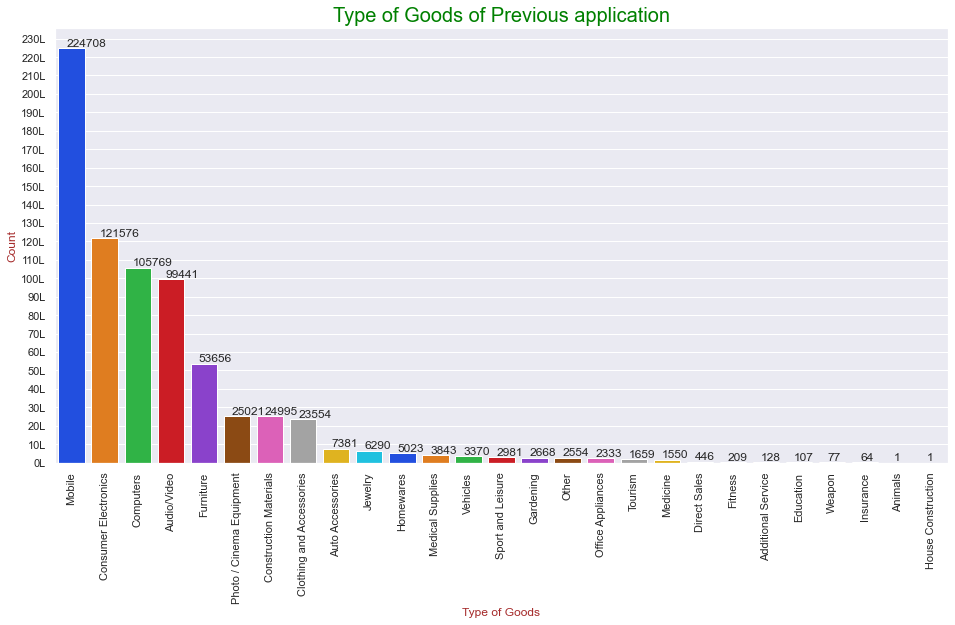

In [92]:
#Type of Goods of Previous application

plt.figure(figsize=(16,8))
ax = sns.countplot(data=inp1, x='NAME_GOODS_CATEGORY', order=inp1.NAME_GOODS_CATEGORY.value_counts().index, palette='bright')
plt.title('Type of Goods of Previous application', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("Type of Goods", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0, 240000, 10000)
labels=['{}L'.format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.xticks(rotation=90)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), va='bottom')

plt.show()

**Inference:**
- Majority of the loans were taken for mobiles, consumer electronics, computers and furniture.

### 4.2 Some Bivariate Analysis after combining the Previous and the Current Data Set

In [93]:
#Merging application and previous application data on 'SK_ID_CURR'
MergedData=pd.merge(left=inp0, right=inp1, how='inner', on='SK_ID_CURR')
MergedData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_BINS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High,Medium,Young_Adult,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,606,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very_High,Very_High,Middle_Age,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Very_High,Very_High,Middle_Age,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,3569

#### CONTRACT STATUS vs CLIENT TYPE

In [94]:
table = pd.pivot_table(MergedData, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072144,0.091767,0.120596,0.083338


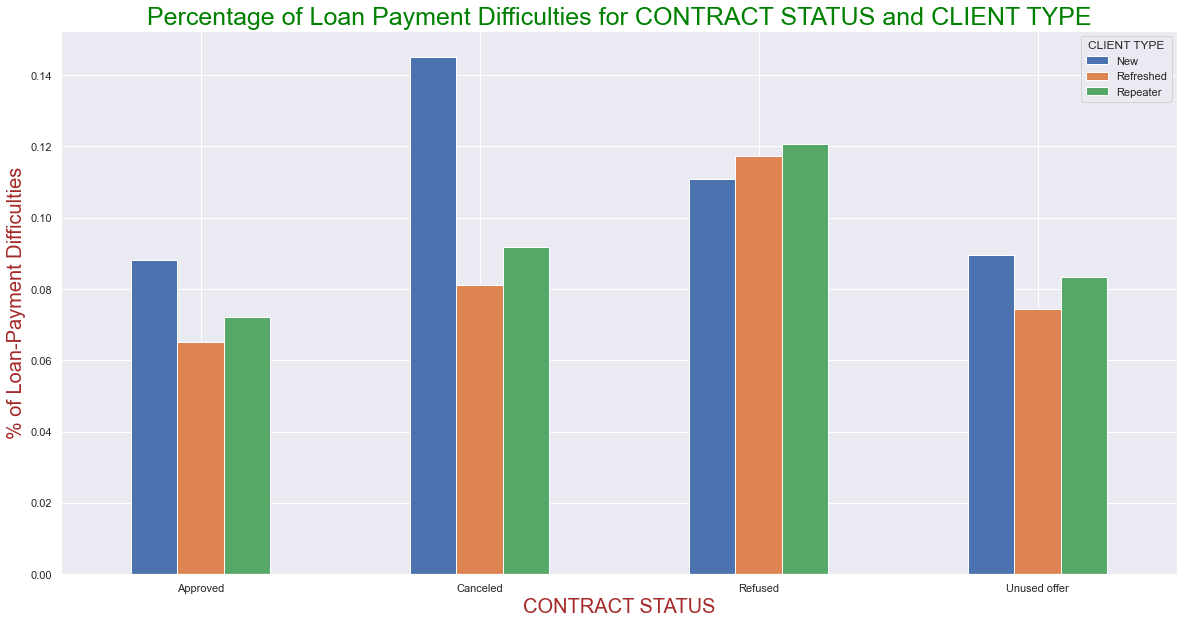

In [95]:
#Percentage of Loan Payment Difficulties for CONTRACT STATUS and CLIENT TYPE
ax = table.T.plot.bar()
plt.title('Percentage of Loan Payment Difficulties for CONTRACT STATUS and CLIENT TYPE', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("CONTRACT STATUS", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("% of Loan-Payment Difficulties", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.xticks(rotation=0)

plt.legend(title='CLIENT TYPE')
plt.show()

**Inference:**
- Clients who were 'New' and had their previous application 'Cancelled' tend to have higher percentage of Loan Payment Difficulties in current application.

#### CONTRACT STATUS vs CHANNEL TYPE

In [96]:
table = pd.pivot_table(MergedData, values='TARGET', index=['CHANNEL_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
table

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
CHANNEL_TYPE,,,,
AP+ (Cash loan),0.102727,0.125504,0.164511,0.000000
Car dealer,0.053030,0.090909,0.036697,NaN
Channel of corporate sales,0.050022,0.050420,0.075051,NaN
Contact center,0.082300,0.098491,0.145073,NaN
Country-wide,0.077424,0.164630,0.111709,0.082864
Credit and cash offices,0.075280,0.090076,0.119042,0.093677
Regional / Local,0.072473,0.082353,0.107626,0.064516
Stone,0.070392,0.086207,0.101811,0.081250


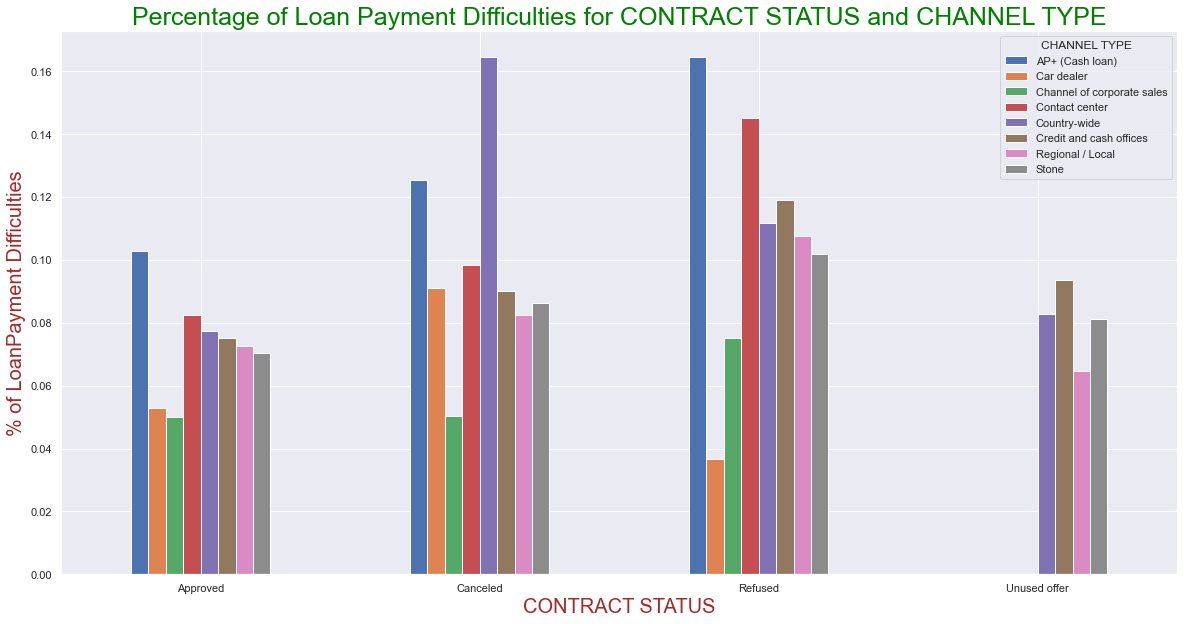

In [97]:
#Percentage of Loan Payment Difficulties for CONTRACT STATUS and CHANNEL TYPE
ax = table.T.plot.bar()
plt.title('Percentage of Loan Payment Difficulties for CONTRACT STATUS and CHANNEL TYPE', fontdict={'fontsize': 25, 'fontweight' : 20, 'color' : 'Green'})
plt.xlabel("CONTRACT STATUS", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("% of LoanPayment Difficulties", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Brown'})
plt.xticks(rotation=0)

plt.legend(title='CHANNEL TYPE')
plt.show()

**Inference:**
- Clients whose Channel Type was AP+(Cash Loan) and Country-wide had their Loan cancelled more than anyone else.
- Clients whose Channel Type was AP+(Cash Loan) and Contact center got their Loan refused more than anyone else.

## 5. CONCLUSION

- Female clients on maternity leave should NOT be targeted as they have no record of repayments. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.
- Clients who want Cash Loans have the highest percentage of Loan Payment Difficulties.
- The count of ‘Lower Secondary’ is comparatively very less and it also has maximum % of payment difficulties. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.
- The count of ‘Low Skilled Laborers’ is comparatively very less and it also has maximum % of payment difficulties. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.
- Clients who are working and from Low Income group need to be targeted LESS by the bank as they have the highest amount of defaulters.
- Banks SHOULD also target female clients as they have the highest repayment (almost as double as males) amongst both the genders.
- Banks SHOULD target clients who own a car as they more likely to repay.
- Majority of the loans were taken for mobiles, consumer electronics, computers and furniture. So the bank should provide better interest in these kind of loans to attract more clients.
- The bank should provide better interest rates and offers for the repeat clients as they’re more likely to repay.
- Application and verification process for the new clients should be made more seamless so that their applications don’t get rejected.